

---


**Student Name:** Raiyan Gani

**Student ID:** 2021-2-60-120

**Course:** CSE366 (3)

**Faculty initial:** MRAR

---



#Assignment 3

**Objective:**

This assignment is designed to give you practical experience in developing and training deep
learning models for computer vision tasks. You have the option to focus on either image
classification or object detection, using specific datasets and model architectures.

# Dataset Information

The dataset contains 1006 leaf images grouped according to their nutritional deficiencies (Boron, Iron, Potasium, Calcium, Magnesium, Manganese, Nitrogen and others). CoLeaf dataset contain images that facilitate training and validation during the utilization of deep learning algorithms for coffee plant leaf nutritional deficiencies recognition and classification.

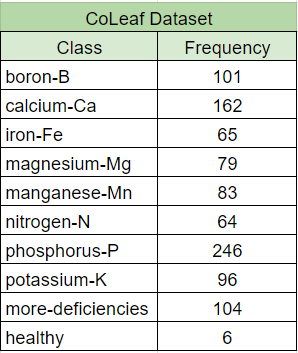

**Citation:** Tuesta-Monteza, Víctor A; Mejia-Cabrera, Heber I.; Arcila-Diaz, Juan (2023), “CoLeaf DATASET”, Mendeley Data, V1, doi: 10.17632/brfgw46wzb.1

**Link:** https://data.mendeley.com/datasets/brfgw46wzb/1

#Data Augmentation

**Load Dataset**

In [ ]:
!gdown --id 1MOdLyYzeLOrtcPbZ6qJDAQi7KUleaR6c

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1MOdLyYzeLOrtcPbZ6qJDAQi7KUleaR6c
From (redirected): https://drive.google.com/uc?id=1MOdLyYzeLOrtcPbZ6qJDAQi7KUleaR6c&confirm=t&uuid=49270716-4e35-48ff-a702-20987d71f006
To: /content/Original_CoLeaf_Dataset.zip
100% 1.82G/1.82G [00:16<00:00, 111MB/s]


In [ ]:
!unzip '/content/Original_CoLeaf_Dataset.zip'

Archive:  /content/Original_CoLeaf_Dataset.zip
  inflating: Original_CoLeaf_Dataset/iron-Fe/Fe (22).jpg  
  inflating: Original_CoLeaf_Dataset/iron-Fe/Fe (13).jpg  
  inflating: Original_CoLeaf_Dataset/iron-Fe/Fe (30).jpg  
  inflating: Original_CoLeaf_Dataset/iron-Fe/Fe (11).jpg  
  inflating: Original_CoLeaf_Dataset/iron-Fe/Fe (32).jpg  
  inflating: Original_CoLeaf_Dataset/iron-Fe/Fe (18).jpg  
  inflating: Original_CoLeaf_Dataset/iron-Fe/Fe (16).jpg  
  inflating: Original_CoLeaf_Dataset/iron-Fe/Fe (12).jpg  
  inflating: Original_CoLeaf_Dataset/iron-Fe/Fe (20).jpg  
  inflating: Original_CoLeaf_Dataset/iron-Fe/Fe (23).jpg  
  inflating: Original_CoLeaf_Dataset/iron-Fe/Fe (29).jpg  
  inflating: Original_CoLeaf_Dataset/iron-Fe/Fe (21).jpg  
  inflating: Original_CoLeaf_Dataset/iron-Fe/Fe (33).jpg  
  inflating: Original_CoLeaf_Dataset/iron-Fe/Fe (52).JPG  
  inflating: Original_CoLeaf_Dataset/iron-Fe/Fe (25).jpg  
  inflating: Original_CoLeaf_Dataset/iron-Fe/Fe (27).jpg  
  inflati

**Augmenting**

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image
from tqdm import tqdm

# Set your main folder path
main_folder_path = '/content/Original_CoLeaf_Dataset'
# Set your output augmented folder path
output_augmented_folder = '/content/Aug'
# Define augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

# Function to augment images in a subfolder
def augment_images(subfolder_path, output_path, target_count):
    # Make sure the output path exists
    if not os.path.exists(output_path):
        os.makedirs(output_path)
    # Load images from the subfolder
    images = os.listdir(subfolder_path)
    num_images = len(images)
    # Calculate augmentation factor
    augmentation_factor = target_count // num_images + 1
    # Perform augmentation
    for image in tqdm(images, desc=f'Augmenting {subfolder_path}'):
        img = Image.open(os.path.join(subfolder_path, image))
        img = img.resize((224, 224))
        img_array = np.expand_dims(np.array(img), axis=0)
        i = 0
        for batch in datagen.flow(img_array, batch_size=1, save_to_dir=output_path, save_prefix='aug', save_format='jpg'):
            i += 1
            if i >= augmentation_factor:
                break

# Iterate through each subfolder
for subfolder_name in os.listdir(main_folder_path):
    subfolder_path = os.path.join(main_folder_path, subfolder_name)
    output_subfolder_path = os.path.join(output_augmented_folder, subfolder_name)
    # Get the desired number of augmented images
    target_count = max(700, min(800, len(os.listdir(subfolder_path))))
    # Augment images
    augment_images(subfolder_path, output_subfolder_path, target_count)


Augmenting /content/Original_CoLeaf_Dataset/phosphorus-P: 100%|██████████| 246/246 [00:35<00:00,  6.96it/s]
Augmenting /content/Original_CoLeaf_Dataset/iron-Fe: 100%|██████████| 65/65 [00:18<00:00,  3.47it/s]
Augmenting /content/Original_CoLeaf_Dataset/manganese-Mn: 100%|██████████| 83/83 [00:23<00:00,  3.59it/s]
Augmenting /content/Original_CoLeaf_Dataset/nitrogen-N: 100%|██████████| 64/64 [00:19<00:00,  3.33it/s]
Augmenting /content/Original_CoLeaf_Dataset/potassium-K: 100%|██████████| 96/96 [00:26<00:00,  3.69it/s]
Augmenting /content/Original_CoLeaf_Dataset/magnesium-Mg: 100%|██████████| 79/79 [00:21<00:00,  3.60it/s]
Augmenting /content/Original_CoLeaf_Dataset/boron-B: 100%|██████████| 101/101 [00:23<00:00,  4.31it/s]
Augmenting /content/Original_CoLeaf_Dataset/calcium-Ca: 100%|██████████| 162/162 [00:36<00:00,  4.49it/s]


**Rename Files**

In [ ]:
import os

input_folder = '/content/Aug/potassium-K'
files = os.listdir(input_folder)
files.sort()  # Sort files for sequential renaming

for i, filename in enumerate(files, start=1):
    # Generate the new name for the file
    new_name = f'aug_potassium-K_({i})'

    # Construct the full paths for the old and new names
    old_path = os.path.join(input_folder, filename)
    new_path = os.path.join(input_folder, f'{new_name}.jpg')  # You can adjust the file extension as needed

    # Rename the file
    os.rename(old_path, new_path)

**Count Images in Each subfolder**

In [ ]:
import os

# Specify the path to your folder containing images
folder_path = '/content/drive/MyDrive/Aug/potassium-K'

# Function to count images in a folder
def count_images(folder_path):
    count = 0
    for filename in os.listdir(folder_path):
        if filename.endswith('.jpg') or filename.endswith('.jpeg') or filename.endswith('.png'):
            count += 1
        else:
            print(f'Ignoring file: {filename}')

    return count

# Get the count of images
image_count = count_images(folder_path)

# Print the result
print(f'The number of images in the folder is: {image_count}')


The number of images in the folder is: 747


**Move Folder to drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!mv /content/Aug /content/drive/MyDrive

After Augmentation number of Images

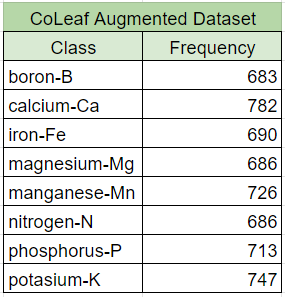

#Augmented Data load and pre-process

In [ ]:
!gdown --id 1bIJvtCZWjuRd9KU1PRj6SuQEJrgisZ3s

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1bIJvtCZWjuRd9KU1PRj6SuQEJrgisZ3s
From (redirected): https://drive.google.com/uc?id=1bIJvtCZWjuRd9KU1PRj6SuQEJrgisZ3s&confirm=t&uuid=25886583-790c-4ec9-9259-a297cdd43a7a
To: /content/Augmented_CoLeaf_Dataset.zip
100% 25.4M/25.4M [00:00<00:00, 77.6MB/s]


In [ ]:
!unzip '/content/Augmented_CoLeaf_Dataset.zip'

Streaming output truncated to the last 5000 lines.
  inflating: Augmented_CoLeaf_Dataset/augmented_calcium-Ca/aug_calcium-Ca_(131).jpg  
  inflating: Augmented_CoLeaf_Dataset/augmented_calcium-Ca/aug_calcium-Ca_(132).jpg  
  inflating: Augmented_CoLeaf_Dataset/augmented_calcium-Ca/aug_calcium-Ca_(133).jpg  
  inflating: Augmented_CoLeaf_Dataset/augmented_calcium-Ca/aug_calcium-Ca_(134).jpg  
  inflating: Augmented_CoLeaf_Dataset/augmented_calcium-Ca/aug_calcium-Ca_(135).jpg  
  inflating: Augmented_CoLeaf_Dataset/augmented_calcium-Ca/aug_calcium-Ca_(136).jpg  
  inflating: Augmented_CoLeaf_Dataset/augmented_calcium-Ca/aug_calcium-Ca_(137).jpg  
  inflating: Augmented_CoLeaf_Dataset/augmented_calcium-Ca/aug_calcium-Ca_(138).jpg  
  inflating: Augmented_CoLeaf_Dataset/augmented_calcium-Ca/aug_calcium-Ca_(139).jpg  
  inflating: Augmented_CoLeaf_Dataset/augmented_calcium-Ca/aug_calcium-Ca_(14).jpg  
  inflating: Augmented_CoLeaf_Dataset/augmented_calcium-Ca/aug_calcium-Ca_(140).jpg  
  in

**Preparing dataset**

In [ ]:
import tensorflow as tf
def load_image(path):
    """Load images in their original RGB format and resize to 224x224"""
    image = tf.io.read_file(path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [224, 224])
    return image

def prepare_dataset(paths, batch_size=32):
    """Prepare a TensorFlow dataset for training or validation"""
    dataset = tf.data.Dataset.from_tensor_slices(paths)
    dataset = dataset.map(lambda x: (load_image(x), get_label(x)), num_parallel_calls=tf.data.AUTOTUNE)
    dataset = dataset.shuffle(buffer_size=1000).batch(batch_size).prefetch(buffer_size=tf.data.AUTOTUNE)
    return dataset

def get_label(file_path):
    """Parse and one-hot encode the label from the file path, ensuring correct shape"""
    parts = tf.strings.split(file_path, os.path.sep)
    label = parts[-2]
    label_id = label_lookup(label)
    one_hot = tf.one_hot(label_id, depth=8)
    return one_hot

label_names = tf.constant(['augmented_boron-B', 'augmented_calcium-Ca', 'augmented_iron-Fe', 'augmented_magnesium-Mg', 'augmented_manganese-Mn', 'augmented_nitrogen-N', 'augmented_phosphorus-P', 'augmented_potassium-K'])
label_to_index = tf.range(len(label_names))

def label_lookup(label_name):
    """Map label name to index"""
    idx = tf.where(label_names == label_name)[0][0]  # Correct indexing to get scalar index
    return idx

**Split Dataset**

Train - 70%

Validation - 20%

Test - 10%

In [ ]:
import os
# Load and split the dataset
folder_path = '/content/Augmented_CoLeaf_Dataset'
all_files = tf.io.gfile.glob(folder_path + '/*/*')
all_files = tf.random.shuffle(all_files)

train_size = int(0.7 * len(all_files))
val_size = int(0.2 * len(all_files))
test_size = len(all_files) - train_size - val_size

train_files = all_files[:train_size]
val_files = all_files[train_size:train_size + val_size]
test_files = all_files[train_size + val_size:]

train_dataset = prepare_dataset(train_files)
val_dataset = prepare_dataset(val_files)
test_dataset = prepare_dataset(test_files)

#**Model 1:** Traditional CNN

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import Dropout, Input, Conv2D, Activation, GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Layer

In [ ]:
class GroupNormalization(Layer):
    def __init__(self, groups=32, **kwargs):
        super(GroupNormalization, self).__init__(**kwargs)
        self.groups = groups

    def build(self, input_shape):
        _, _, _, self.C = input_shape
        self.epsilon = 1e-5
        self.gamma = self.add_weight(name='gamma', shape=(1, 1, 1, self.C), initializer='ones', trainable=True)
        self.beta = self.add_weight(name='beta', shape=(1, 1, 1, self.C), initializer='zeros', trainable=True)

    def call(self, inputs):
        input_shape = tf.shape(inputs)
        N, H, W, _ = input_shape[0], input_shape[1], input_shape[2], self.C
        inputs = tf.reshape(inputs, [N, H, W, self.groups, self.C // self.groups])
        mean, var = tf.nn.moments(inputs, axes=[1, 2, 4], keepdims=True)
        inputs = (inputs - mean) / tf.sqrt(var + self.epsilon)
        inputs = tf.reshape(inputs, input_shape)
        inputs = inputs * self.gamma + self.beta
        return inputs

In [ ]:
def create_cnn(input_shape, dropout_rate=0.5):
    """Build an Attention-Guided CNN model using Keras with Dropout and Layer Normalization"""
    inputs = Input(shape=input_shape)
    x = Conv2D(32, (3, 3))(inputs)
    x = Activation('relu')(x)
    x = GroupNormalization()(x)  # Replace BatchNormalization with GroupNormalization


    x = Conv2D(64, (3, 3))(x)
    x = Activation('relu')(x)
    x = GroupNormalization()(x)  # Replace BatchNormalization with GroupNormalization

    x = Dropout(0.5)(x)
    x = GlobalAveragePooling2D()(x)
    outputs = Dense(8, activation='softmax')(x)

    # Create model
    model = Model(inputs, outputs)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

# Create and train the model
input_shape = (224, 224, 3)
model = create_cnn(input_shape)
history = model.fit(train_dataset, validation_data=val_dataset, epochs=50, callbacks=[early_stopping])

Epoch 1/50
125/125 [==============================] - 57s 401ms/step - loss: 1.6894 - accuracy: 0.3711 - val_loss: 1.5129 - val_accuracy: 0.4116
Epoch 2/50
125/125 [==============================] - 45s 359ms/step - loss: 1.4072 - accuracy: 0.4914 - val_loss: 1.3835 - val_accuracy: 0.4807
Epoch 3/50
125/125 [==============================] - 46s 359ms/step - loss: 1.3104 - accuracy: 0.5236 - val_loss: 1.2663 - val_accuracy: 0.5000
Epoch 4/50
125/125 [==============================] - 46s 367ms/step - loss: 1.2147 - accuracy: 0.5426 - val_loss: 1.1773 - val_accuracy: 0.5560
Epoch 5/50
125/125 [==============================] - 45s 359ms/step - loss: 1.1495 - accuracy: 0.5796 - val_loss: 1.1948 - val_accuracy: 0.5149
Epoch 6/50
125/125 [==============================] - 46s 359ms/step - loss: 1.0989 - accuracy: 0.5956 - val_loss: 1.1024 - val_accuracy: 0.6130
Epoch 7/50
125/125 [==============================] - 45s 358ms/step - loss: 1.0966 - accuracy: 0.5836 - val_loss: 1.0824 - val_ac

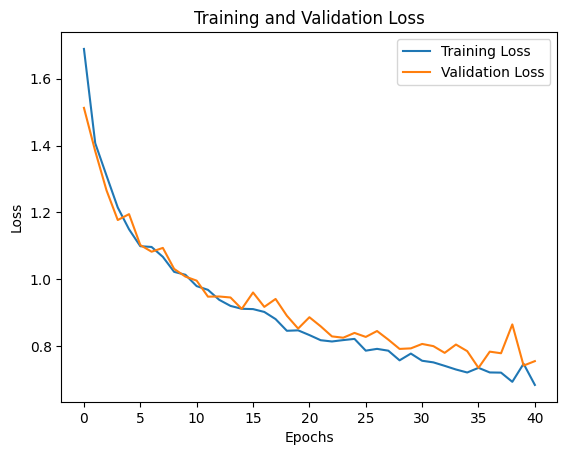

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Test code to evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

18/18 [==============================] - 3s 157ms/step - loss: 0.7162 - accuracy: 0.7185
Test Loss: 0.716175377368927, Test Accuracy: 0.7185314893722534


In [ ]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from tensorflow.keras.utils import to_categorical


def dataset_to_numpy_arrays(dataset):
    all_images = []
    all_labels = []
    for images, labels in dataset.unbatch().batch(1).as_numpy_iterator():
        all_images.append(images[0])
        all_labels.append(np.argmax(labels[0]))  # Assuming labels are one-hot encoded
    return np.array(all_images), np.array(all_labels)

# Predict on test set
test_images, test_true_labels = dataset_to_numpy_arrays(test_dataset)
test_pred_probs = model.predict(test_images)
test_pred_labels = np.argmax(test_pred_probs, axis=1)

# Calculate precision, recall, and F1-score using sklearn
precision = precision_score(test_true_labels, test_pred_labels, average='macro')
recall = recall_score(test_true_labels, test_pred_labels, average='macro')
f1 = f1_score(test_true_labels, test_pred_labels, average='macro')

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

18/18 [==============================] - 2s 103ms/step
Precision: 0.7316370721869543
Recall: 0.7189362157078782
F1-Score: 0.7116972575648981


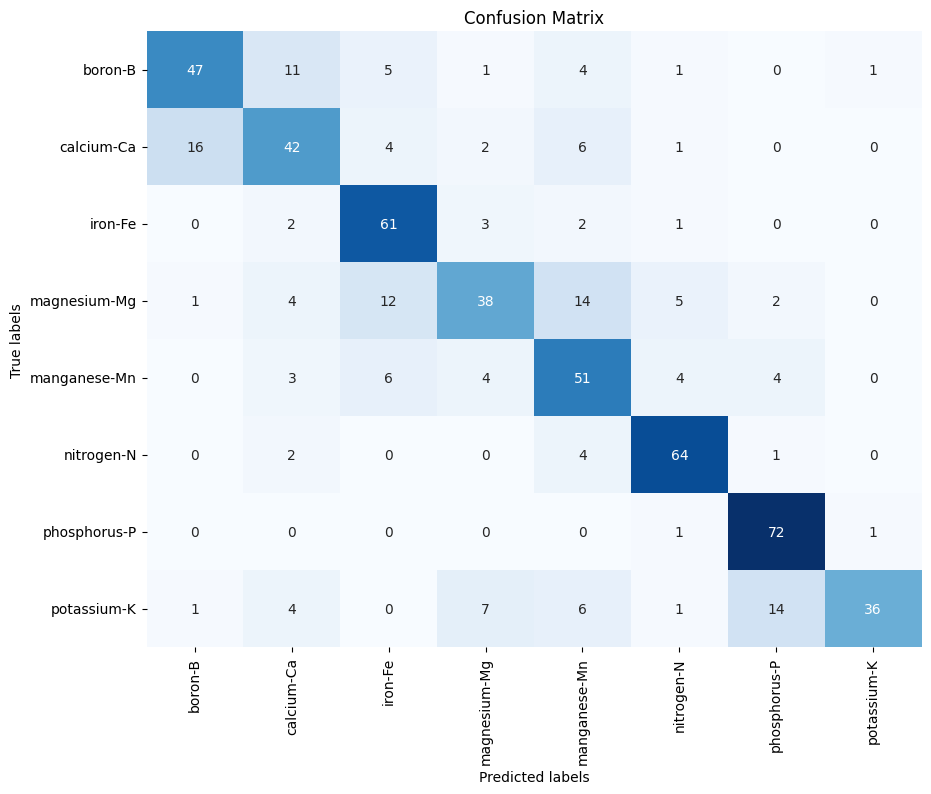

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

class_names = ['boron-B', 'calcium-Ca', 'iron-Fe', 'magnesium-Mg', 'manganese-Mn', 'nitrogen-N', 'phosphorus-P', 'potassium-K']

# Generate confusion matrix
conf_matrix = confusion_matrix(test_true_labels, test_pred_labels)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=class_names, yticklabels=class_names)  # Add class names here
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Save the model
model.save('/content/CoLeaf_model_resnet50.h5')

In [ ]:
model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_8 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 activation_2 (Activation)   (None, 222, 222, 32)      0         
                                                                 
 group_normalization_2 (Gro  (None, 222, 222, 32)      64        
 upNormalization)                                                
                                                                 
 conv2d_9 (Conv2D)           (None, 220, 220, 64)      18496     
                                                                 
 activation_3 (Activation)   (None, 220, 220, 64)      0         
                                                           

#**Model 2:** EfficientNet B3

In [ ]:
from tensorflow.keras.applications import EfficientNetB3
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

In [ ]:
# Load the EfficientNetB3 model without the top layer:
base_model = EfficientNetB3(input_shape=(224,224,3), include_top=False, weights='imagenet')

In [ ]:
# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
# Create a Sequential model
x = base_model.output
x = Dropout(0.3)(x)  # Add a dropout layer
x = GlobalAveragePooling2D()(x)

predictions = Dense(8, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

In [ ]:
# Compile the model:
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

# train the model (replace this with your model)
history = model.fit(train_dataset, validation_data=val_dataset, epochs=50, callbacks=[early_stopping])

Epoch 1/50
125/125 [==============================] - 33s 173ms/step - loss: 1.4413 - accuracy: 0.4906 - val_loss: 1.1361 - val_accuracy: 0.5911
Epoch 2/50
125/125 [==============================] - 21s 157ms/step - loss: 1.0365 - accuracy: 0.6499 - val_loss: 0.9412 - val_accuracy: 0.6743
Epoch 3/50
125/125 [==============================] - 20s 154ms/step - loss: 0.8965 - accuracy: 0.6932 - val_loss: 0.8670 - val_accuracy: 0.6883
Epoch 4/50
125/125 [==============================] - 19s 150ms/step - loss: 0.8197 - accuracy: 0.7272 - val_loss: 0.8050 - val_accuracy: 0.7198
Epoch 5/50
125/125 [==============================] - 20s 153ms/step - loss: 0.7577 - accuracy: 0.7459 - val_loss: 0.7570 - val_accuracy: 0.7434
Epoch 6/50
125/125 [==============================] - 20s 154ms/step - loss: 0.7068 - accuracy: 0.7597 - val_loss: 0.7329 - val_accuracy: 0.7522
Epoch 7/50
125/125 [==============================] - 19s 151ms/step - loss: 0.6633 - accuracy: 0.7762 - val_loss: 0.6745 - val_ac

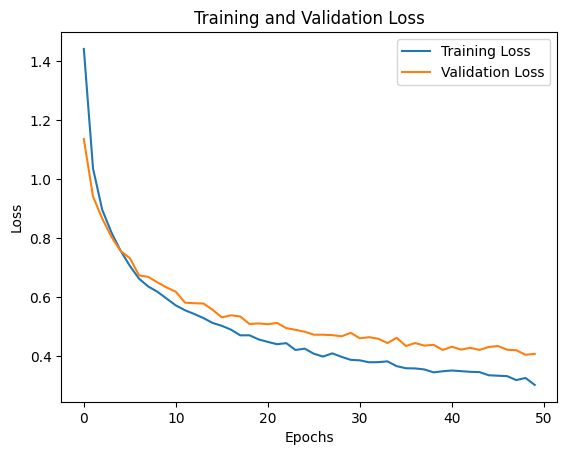

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Test code to evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

18/18 [==============================] - 2s 111ms/step - loss: 0.3939 - accuracy: 0.8654
Test Loss: 0.3938749134540558, Test Accuracy: 0.8653846383094788


In [ ]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from tensorflow.keras.utils import to_categorical


def dataset_to_numpy_arrays(dataset):
    all_images = []
    all_labels = []
    for images, labels in dataset.unbatch().batch(1).as_numpy_iterator():
        all_images.append(images[0])
        all_labels.append(np.argmax(labels[0]))  # Assuming labels are one-hot encoded
    return np.array(all_images), np.array(all_labels)

# Predict on test set
test_images, test_true_labels = dataset_to_numpy_arrays(test_dataset)
test_pred_probs = model.predict(test_images)
test_pred_labels = np.argmax(test_pred_probs, axis=1)

# Calculate precision, recall, and F1-score using sklearn
precision = precision_score(test_true_labels, test_pred_labels, average='macro')
recall = recall_score(test_true_labels, test_pred_labels, average='macro')
f1 = f1_score(test_true_labels, test_pred_labels, average='macro')

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")


18/18 [==============================] - 2s 106ms/step
Precision: 0.8734371613217699
Recall: 0.8677674643679072
F1-Score: 0.8675581036409967


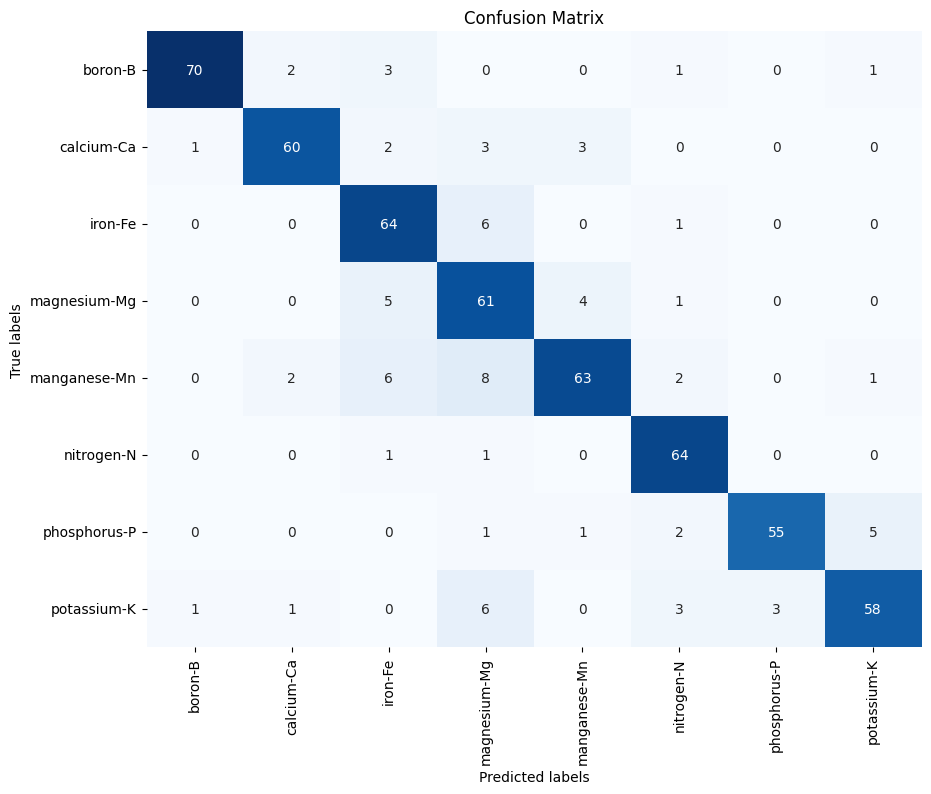

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

class_names = ['boron-B', 'calcium-Ca', 'iron-Fe', 'magnesium-Mg', 'manganese-Mn', 'nitrogen-N', 'phosphorus-P', 'potassium-K']

# Generate confusion matrix
conf_matrix = confusion_matrix(test_true_labels, test_pred_labels)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=class_names, yticklabels=class_names)  # Add class names here
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# Save the model
model.save('/content/CoLeaf_model_efficientnetb3.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model.summary()

Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_6 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 rescaling_6 (Rescaling)     (None, 224, 224, 3)          0         ['input_6[0][0]']             
                                                                                                  
 normalization_3 (Normaliza  (None, 224, 224, 3)          7         ['rescaling_6[0][0]']         
 tion)                                                                                            
                                                                                                  
 rescaling_7 (Rescaling)     (None, 224, 224, 3)          0         ['normalization_3[0][0]'

#**Model 3:** MobileNet V2

In [ ]:
from keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
import os

In [ ]:
# Load the MobileNetV2 model without the top layer:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

9406464/9406464 [==============================] - 2s 0us/step


In [ ]:
# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
# Create a Sequential model
x = base_model.output
x = Dense(32, activation='relu')(x)
x = Dropout(0.5)(x)  # Adjust dropout rate
x = GlobalAveragePooling2D()(x)

predictions = Dense(8, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

In [ ]:
# Compile the model:
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

# train the model
history = model.fit(train_dataset, validation_data=val_dataset, epochs=50, callbacks=[early_stopping])

Epoch 1/50
125/125 [==============================] - 16s 75ms/step - loss: 1.6738 - accuracy: 0.3768 - val_loss: 1.3451 - val_accuracy: 0.5245
Epoch 2/50
125/125 [==============================] - 9s 63ms/step - loss: 1.3368 - accuracy: 0.5211 - val_loss: 1.2007 - val_accuracy: 0.5762
Epoch 3/50
125/125 [==============================] - 9s 65ms/step - loss: 1.1915 - accuracy: 0.5789 - val_loss: 1.1412 - val_accuracy: 0.5823
Epoch 4/50
125/125 [==============================] - 8s 64ms/step - loss: 1.1108 - accuracy: 0.6029 - val_loss: 1.1383 - val_accuracy: 0.5762
Epoch 5/50
125/125 [==============================] - 8s 60ms/step - loss: 1.0483 - accuracy: 0.6239 - val_loss: 1.0859 - val_accuracy: 0.6086
Epoch 6/50
125/125 [==============================] - 9s 64ms/step - loss: 0.9810 - accuracy: 0.6399 - val_loss: 1.0224 - val_accuracy: 0.6313
Epoch 7/50
125/125 [==============================] - 8s 64ms/step - loss: 0.9300 - accuracy: 0.6654 - val_loss: 1.0231 - val_accuracy: 0.617

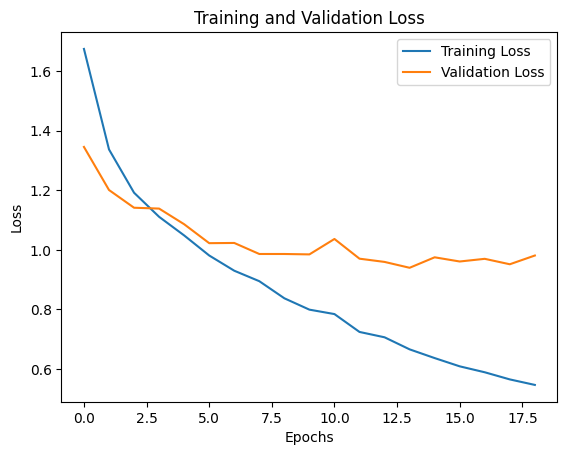

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Test code to evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

18/18 [==============================] - 1s 48ms/step - loss: 0.9515 - accuracy: 0.6626
Test Loss: 0.951470136642456, Test Accuracy: 0.6625874042510986


In [ ]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from tensorflow.keras.utils import to_categorical


def dataset_to_numpy_arrays(dataset):
    all_images = []
    all_labels = []
    for images, labels in dataset.unbatch().batch(1).as_numpy_iterator():
        all_images.append(images[0])
        all_labels.append(np.argmax(labels[0]))  # Assuming labels are one-hot encoded
    return np.array(all_images), np.array(all_labels)

# Predict on test set
test_images, test_true_labels = dataset_to_numpy_arrays(test_dataset)
test_pred_probs = model.predict(test_images)
test_pred_labels = np.argmax(test_pred_probs, axis=1)

# Calculate precision, recall, and F1-score using sklearn
precision = precision_score(test_true_labels, test_pred_labels, average='macro')
recall = recall_score(test_true_labels, test_pred_labels, average='macro')
f1 = f1_score(test_true_labels, test_pred_labels, average='macro')

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")


18/18 [==============================] - 2s 45ms/step
Precision: 0.6541688944433549
Recall: 0.6466120141882256
F1-Score: 0.641624809760751


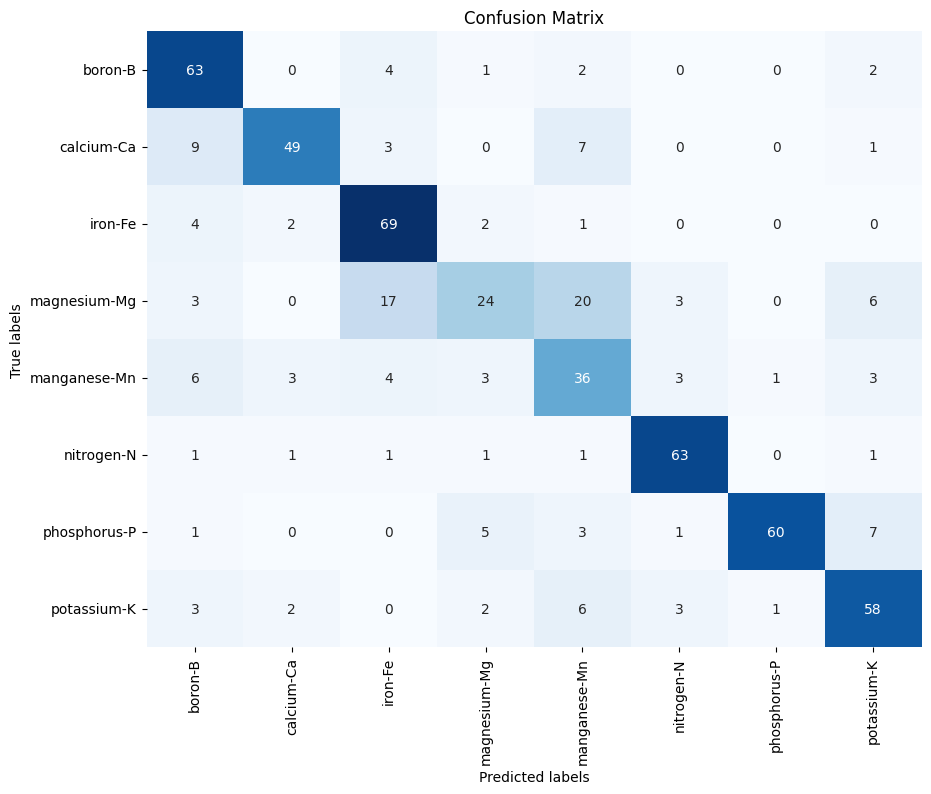

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

class_names = ['boron-B', 'calcium-Ca', 'iron-Fe', 'magnesium-Mg', 'manganese-Mn', 'nitrogen-N', 'phosphorus-P', 'potassium-K']

# Generate confusion matrix
conf_matrix = confusion_matrix(test_true_labels, test_pred_labels)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=class_names, yticklabels=class_names)  # Add class names here
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Save the model
model.save('/content/CoLeaf_model_mobilenetv2.h5')

In [ ]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_2[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[0][0]']      

#**Model 4:** DenseNet 121

In [ ]:
from keras.applications import DenseNet121
from tensorflow.keras.layers import MaxPooling2D, Dropout, Dense, GlobalAveragePooling2D, Reshape
from keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
import os

In [ ]:
# Load the DenseNet121 model without the top layer:
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

29084464/29084464 [==============================] - 2s 0us/step


In [ ]:
# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
# Create a Sequential model
x = base_model.output
x = Dense(64, activation='relu')(x)
x = Dropout(0.5)(x)  # Adjust dropout rate
x = GlobalAveragePooling2D()(x)

predictions = Dense(8, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

In [ ]:
# Compile the model:
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

# train the model
history = model.fit(train_dataset, validation_data=val_dataset, epochs=50, callbacks=[early_stopping])

Epoch 1/50
125/125 [==============================] - 29s 146ms/step - loss: 2.3049 - accuracy: 0.3261 - val_loss: 1.3812 - val_accuracy: 0.5044
Epoch 2/50
125/125 [==============================] - 17s 132ms/step - loss: 1.3987 - accuracy: 0.4856 - val_loss: 1.2219 - val_accuracy: 0.5630
Epoch 3/50
125/125 [==============================] - 17s 132ms/step - loss: 1.1992 - accuracy: 0.5639 - val_loss: 1.0949 - val_accuracy: 0.6121
Epoch 4/50
125/125 [==============================] - 17s 131ms/step - loss: 1.1068 - accuracy: 0.5991 - val_loss: 1.0740 - val_accuracy: 0.6226
Epoch 5/50
125/125 [==============================] - 17s 132ms/step - loss: 1.0554 - accuracy: 0.6254 - val_loss: 1.0793 - val_accuracy: 0.6252
Epoch 6/50
125/125 [==============================] - 17s 131ms/step - loss: 0.9919 - accuracy: 0.6432 - val_loss: 0.9948 - val_accuracy: 0.6550
Epoch 7/50
125/125 [==============================] - 18s 143ms/step - loss: 0.9551 - accuracy: 0.6519 - val_loss: 0.9765 - val_ac

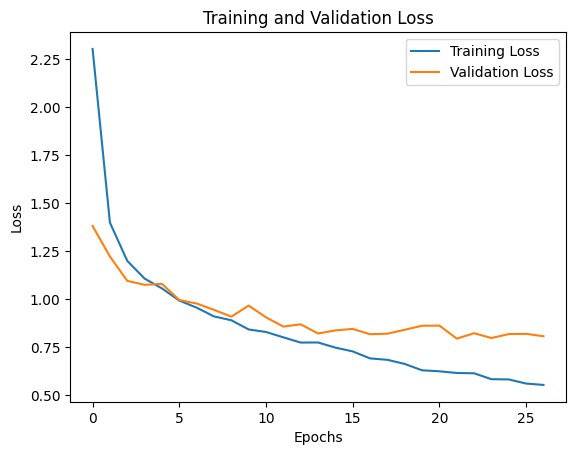

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Test code to evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

18/18 [==============================] - 2s 95ms/step - loss: 0.7760 - accuracy: 0.7378
Test Loss: 0.7760156989097595, Test Accuracy: 0.7377622127532959


In [ ]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from tensorflow.keras.utils import to_categorical


def dataset_to_numpy_arrays(dataset):
    all_images = []
    all_labels = []
    for images, labels in dataset.unbatch().batch(1).as_numpy_iterator():
        all_images.append(images[0])
        all_labels.append(np.argmax(labels[0]))  # Assuming labels are one-hot encoded
    return np.array(all_images), np.array(all_labels)

# Predict on test set
test_images, test_true_labels = dataset_to_numpy_arrays(test_dataset)
test_pred_probs = model.predict(test_images)
test_pred_labels = np.argmax(test_pred_probs, axis=1)

# Calculate precision, recall, and F1-score using sklearn
precision = precision_score(test_true_labels, test_pred_labels, average='macro')
recall = recall_score(test_true_labels, test_pred_labels, average='macro')
f1 = f1_score(test_true_labels, test_pred_labels, average='macro')

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")


18/18 [==============================] - 4s 93ms/step
Precision: 0.7429174113823209
Recall: 0.7342868147224617
F1-Score: 0.7267769326540888


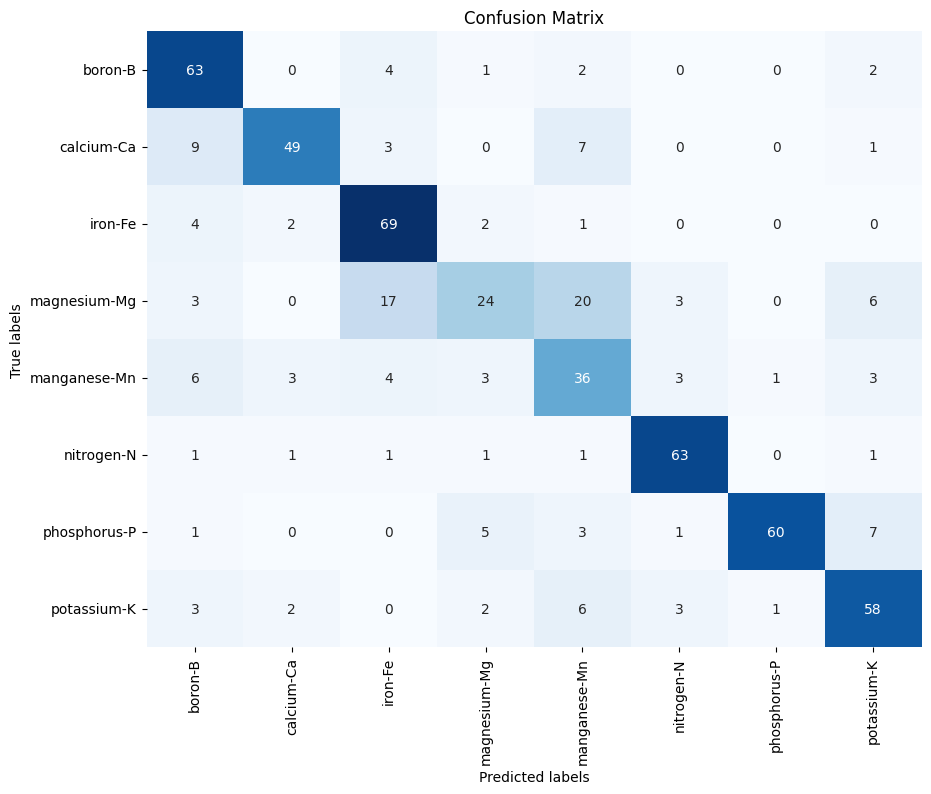

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

class_names = ['boron-B', 'calcium-Ca', 'iron-Fe', 'magnesium-Mg', 'manganese-Mn', 'nitrogen-N', 'phosphorus-P', 'potassium-K']

# Generate confusion matrix
conf_matrix = confusion_matrix(test_true_labels, test_pred_labels)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=class_names, yticklabels=class_names)  # Add class names here
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# Save the model
model.save('/content/CoLeaf_model_densenet121.h5')

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 zero_padding2d (ZeroPaddin  (None, 230, 230, 3)          0         ['input_1[0][0]']             
 g2D)                                                                                             
                                                                                                  
 conv1/conv (Conv2D)         (None, 112, 112, 64)         9408      ['zero_padding2d[0][0]']      
                                                                                                  
 conv1/bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1/conv[0][0]']    

#**Model 5:** ResNet50

In [ ]:
from keras.applications import ResNet50
from tensorflow.keras.layers import MaxPooling2D, Dropout, Dense, GlobalAveragePooling2D, Reshape
from keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
import os

In [ ]:
# Load the ResNet50 model without the top layer:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

94765736/94765736 [==============================] - 3s 0us/step


In [ ]:
# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
# Create a Sequential model
x = base_model.output
x = Dropout(0.5)(x)  # Adjust dropout rate
x = GlobalAveragePooling2D()(x)

predictions = Dense(8, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

In [ ]:
# Compile the model:
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

# train the model
history = model.fit(train_dataset, validation_data=val_dataset, epochs=50, callbacks=[early_stopping])

Epoch 1/50
125/125 [==============================] - 25s 165ms/step - loss: 1.2602 - accuracy: 0.5409 - val_loss: 0.9668 - val_accuracy: 0.6576
Epoch 2/50
125/125 [==============================] - 16s 127ms/step - loss: 0.8406 - accuracy: 0.7012 - val_loss: 0.8207 - val_accuracy: 0.6953
Epoch 3/50
125/125 [==============================] - 16s 127ms/step - loss: 0.7086 - accuracy: 0.7499 - val_loss: 0.7462 - val_accuracy: 0.7285
Epoch 4/50
125/125 [==============================] - 17s 130ms/step - loss: 0.6336 - accuracy: 0.7787 - val_loss: 0.7033 - val_accuracy: 0.7320
Epoch 5/50
125/125 [==============================] - 17s 129ms/step - loss: 0.5873 - accuracy: 0.7972 - val_loss: 0.6704 - val_accuracy: 0.7531
Epoch 6/50
125/125 [==============================] - 18s 141ms/step - loss: 0.5400 - accuracy: 0.8200 - val_loss: 0.6443 - val_accuracy: 0.7715
Epoch 7/50
125/125 [==============================] - 17s 129ms/step - loss: 0.5088 - accuracy: 0.8225 - val_loss: 0.6652 - val_ac

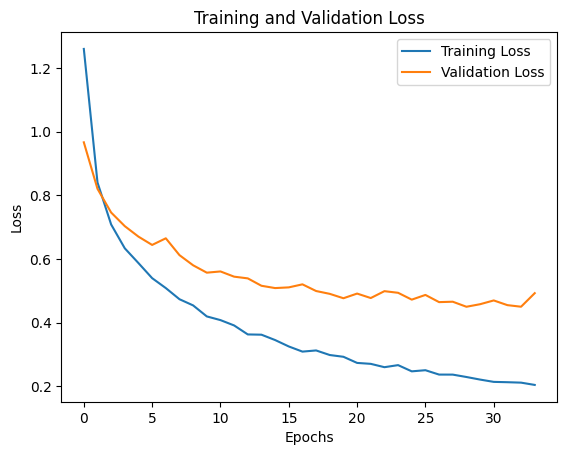

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Test code to evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

18/18 [==============================] - 2s 98ms/step - loss: 0.4312 - accuracy: 0.8479
Test Loss: 0.43117555975914, Test Accuracy: 0.8479021191596985


In [ ]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from tensorflow.keras.utils import to_categorical


def dataset_to_numpy_arrays(dataset):
    all_images = []
    all_labels = []
    for images, labels in dataset.unbatch().batch(1).as_numpy_iterator():
        all_images.append(images[0])
        all_labels.append(np.argmax(labels[0]))  # Assuming labels are one-hot encoded
    return np.array(all_images), np.array(all_labels)

# Predict on test set
test_images, test_true_labels = dataset_to_numpy_arrays(test_dataset)
test_pred_probs = model.predict(test_images)
test_pred_labels = np.argmax(test_pred_probs, axis=1)

# Calculate precision, recall, and F1-score using sklearn
precision = precision_score(test_true_labels, test_pred_labels, average='macro')
recall = recall_score(test_true_labels, test_pred_labels, average='macro')
f1 = f1_score(test_true_labels, test_pred_labels, average='macro')

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

18/18 [==============================] - 2s 92ms/step
Precision: 0.8579068669546885
Recall: 0.8485635395667841
F1-Score: 0.8502149980885656


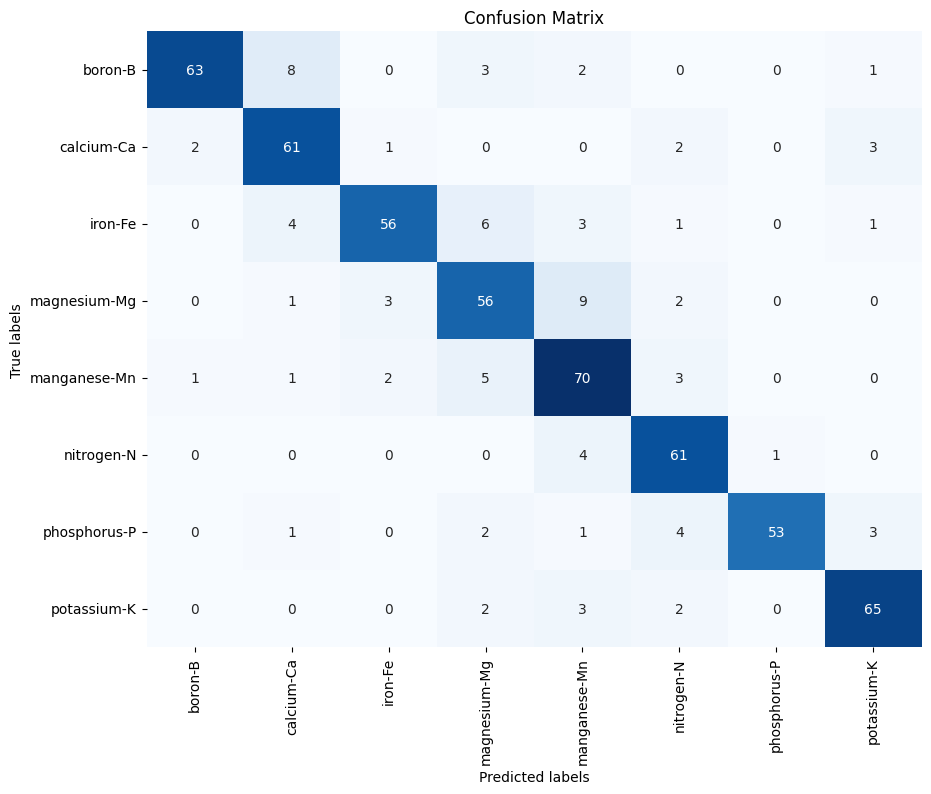

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

class_names = ['boron-B', 'calcium-Ca', 'iron-Fe', 'magnesium-Mg', 'manganese-Mn', 'nitrogen-N', 'phosphorus-P', 'potassium-K']

# Generate confusion matrix
conf_matrix = confusion_matrix(test_true_labels, test_pred_labels)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=class_names, yticklabels=class_names)  # Add class names here
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Save the model
model.save('/content/CoLeaf_model_resnet50.h5')

In [ ]:
model.summary()

Model: "model_13"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_10 (InputLayer)       [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_10[0][0]']            
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                       

#Summary


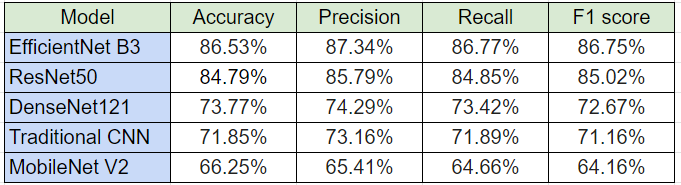